In [146]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (9, 14)

In [147]:
def gong(t, initial_condition, k, w0, w1, a, b, F):
    y, z = initial_condition
    
    dy = z
    dz = -2*k*z - w0**2*(y + a*y**2 + b*y**3) + F*np.sin(w1*t)
    
    return [dy, dz]

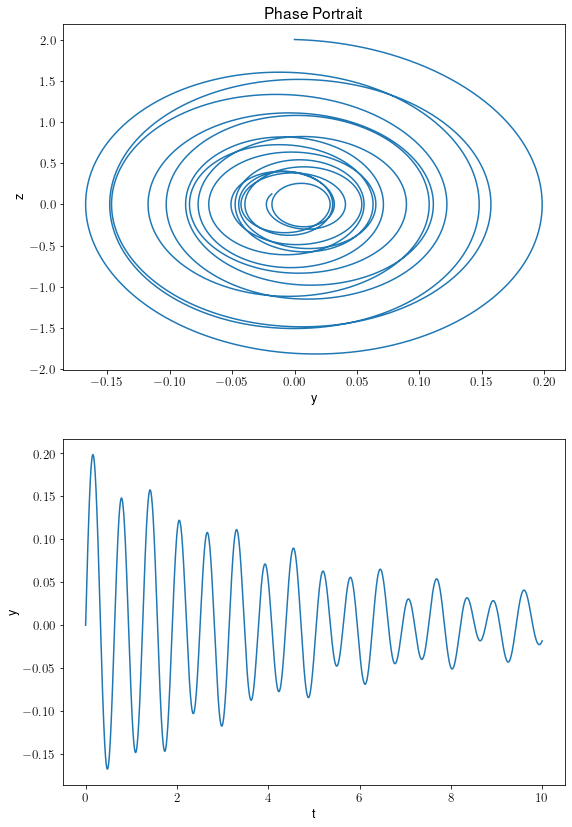

In [148]:
# Set parameters and initial condition

k = .2   # damping
w0 = 10  # mode freq
w1 = 6   # driving freq
a = -.1  # quadratic coef
b = -.1  # cubic coef
F = 1    # Input force amplitude

parameters = (k, w0, w1, a, b, F)

initial_condition = [0, 2]  # [velocity, acceleration]

# Run ODE solver

t_span = (0, 10)
t = np.arange(0, 10, 0.001)

result = solve_ivp(gong, t_span, initial_condition, args=parameters, t_eval = t)

fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.plot(result.y[0, :],
        result.y[1, :])
ax.set_title('Phase Portrait')
plt.xlabel('y')
plt.ylabel('z')

ax = fig.add_subplot(2, 1, 2)
ax.plot(t,
        result.y[0, :]
       )
plt.xlabel('t')
plt.ylabel('y')

plt.rc('font', size=13) 

